# scplotter to work with SlideSeq data prepared by Seurat

See: <https://satijalab.org/seurat/articles/seurat5_spatial_vignette_2#human-lung-nanostring-cosmx-spatial-molecular-imager>

Go back to scplotter documentation: <https://pwwang.github.io/scplotter/>

In [1]:
options(future.globals.maxSize = 512 * 1024^3) # 512 GB
suppressPackageStartupMessages({
    library(Seurat)
})
# Load the scplotter package
# library(scplotter)
devtools::load_all()
# devtools::load_all("../../../plotthis")

# see also the vignette for scplotter to work with CosMx data prepared by Giotto
data.dir <- "data/CosMx_Quarter_Brain/Quarter_Brain"
obj <- LoadNanostring(data.dir = data.dir, fov = 'fov')
obj

ℹ Loading scplotter


An object of class Seurat 
960 features across 38987 samples within 1 assay 
Active assay: Nanostring (960 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: fov

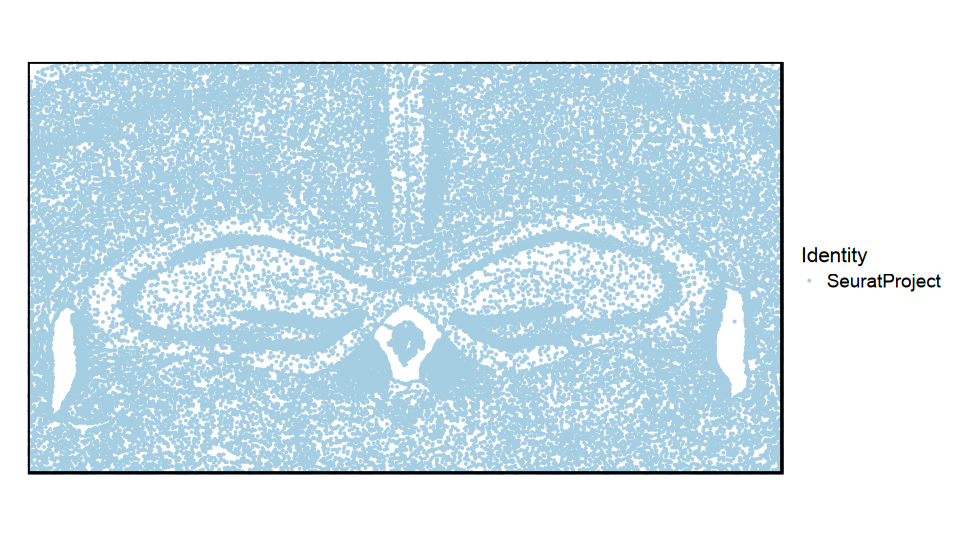

In [75]:
options(repr.plot.width = 8, repr.plot.height = 4.5)

SpatDimPlot(obj, points_size = 0.5)

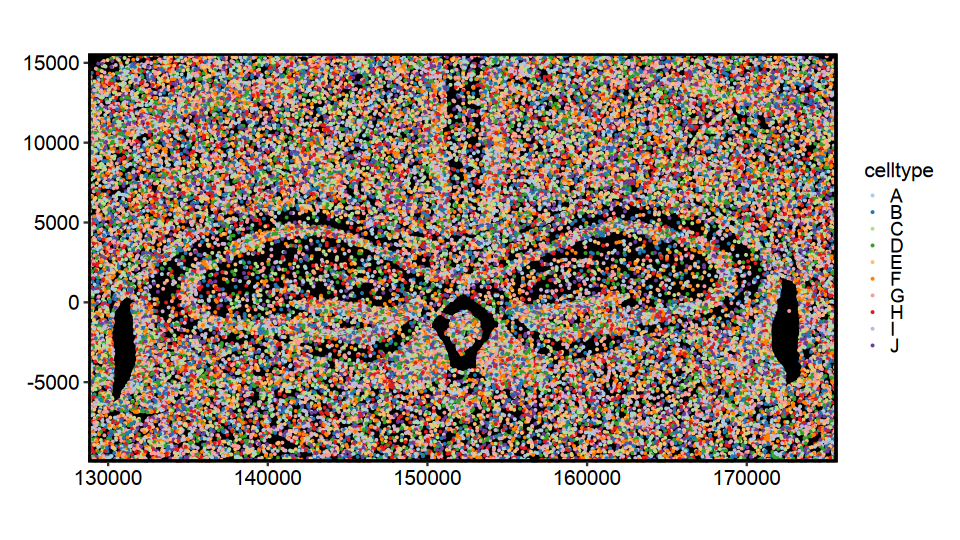

In [121]:
# add fake annotations

obj$celltype <- sample(LETTERS[1:10], size = ncol(obj), replace = TRUE)
obj$celltype <- factor(obj$celltype, levels = LETTERS[1:10])
Idents(obj) <- "celltype"

options(repr.plot.width = 8, repr.plot.height = 4.5)
SpatDimPlot(obj, image = "black", group_by = "celltype", points_size = 0.5,
    theme = "theme_this")

Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


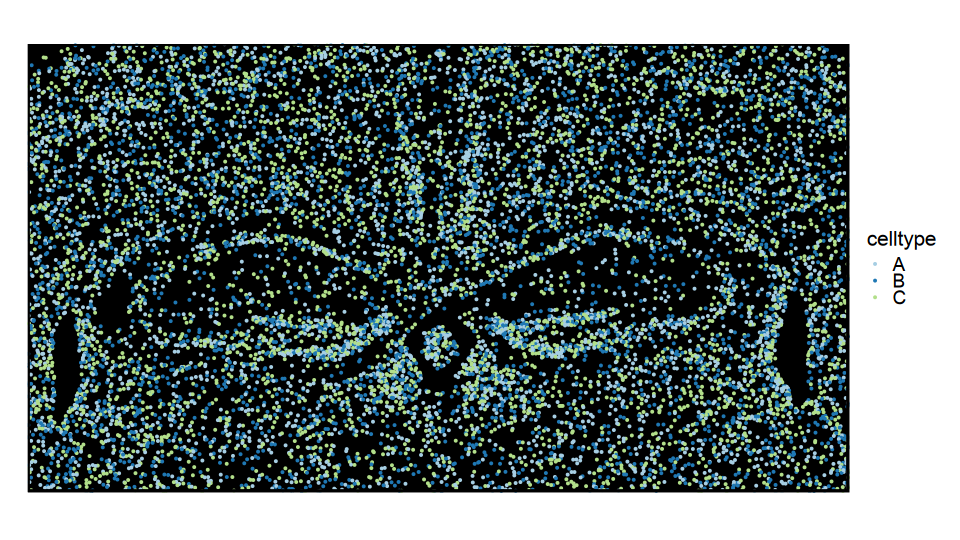

In [77]:
options(repr.plot.width = 8, repr.plot.height = 4.5)

subobj <- subset(obj, celltype %in% c("A", "B", "C"))

SpatFeaturePlot(subobj, image = "black", group_by = "celltype", points_size = 0.5)

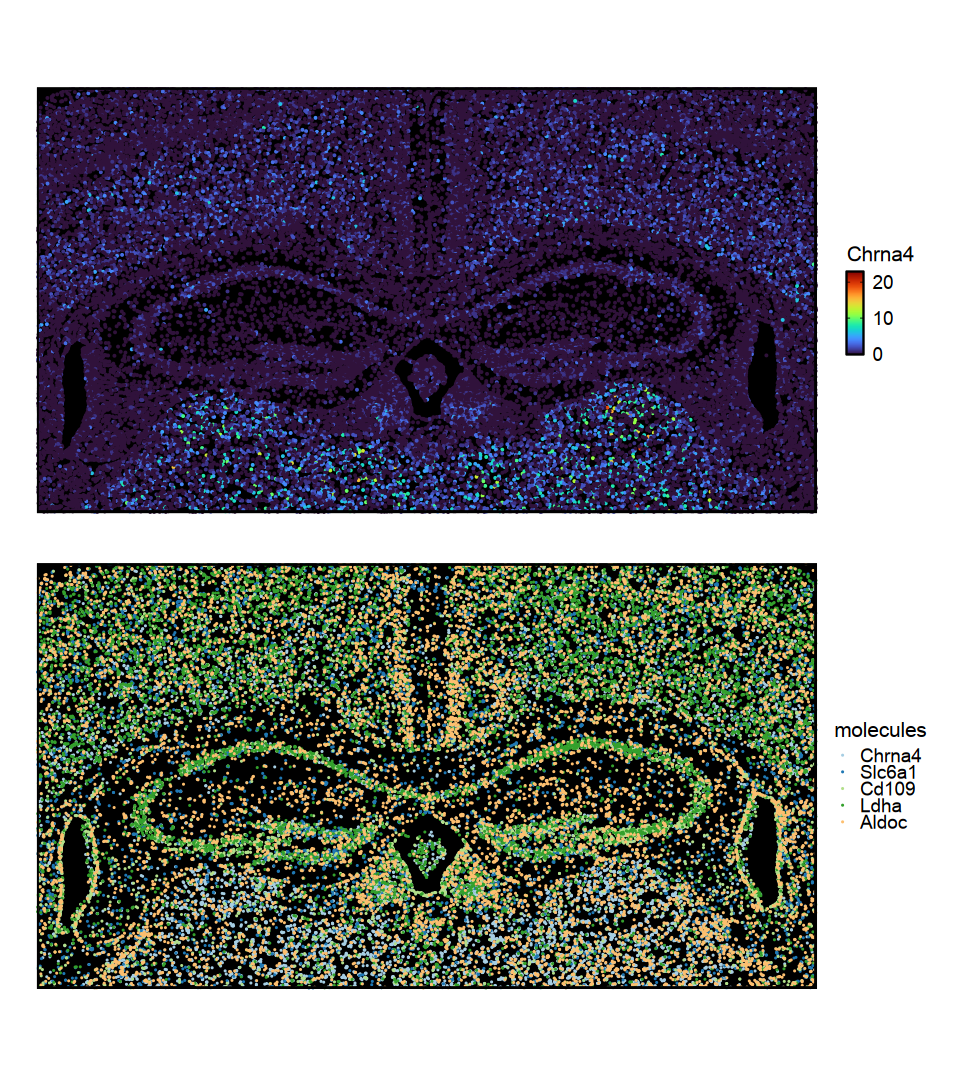

In [84]:
options(repr.plot.width = 8, repr.plot.height = 9)

p1 <- SpatFeaturePlot(obj, image = "black", features = "Chrna4", layer = "counts", points_size = 0.5)
p2 <- SpatDimPlot(obj, image = "black", features = c('Chrna4', 'Slc6a1', 'Cd109', 'Ldha', 'Aldoc'),
    points_size = 0.25, nmols = 10000)

p1 / p2

Warning message:
“Key ‘Nanostring_’ taken, using ‘zoom1_’ instead”
Warning message:
“Adding image with unordered cells”
ℹ Loading scplotter


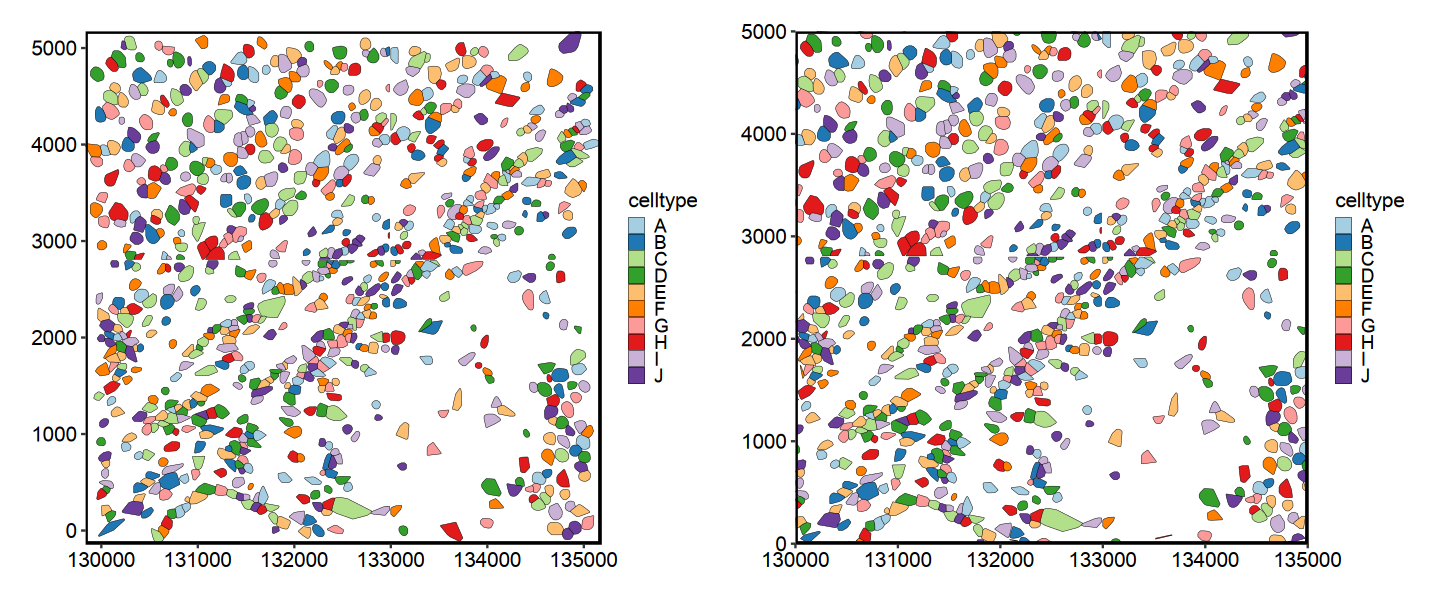

In [129]:
options(repr.plot.width = 12, repr.plot.height = 5)

# Note that Crop() swapped x and y
crop <- Crop(obj[["fov"]], y = c(130000, 135000), x = c(0, 5000))
obj[["zoom1"]] <- crop
DefaultBoundary(obj[["zoom1"]]) <- "segmentation"
# devtools::load_all()

# Use cropped fov
p1 <- SpatDimPlot(obj, fov = "zoom1", points = FALSE, shapes_fill_by = "celltype",
    shapes_border_size = 0.1, theme = "theme_this")

# Or just pass the desired extent
# Note that the extent is in the right x and y order
p2 <- SpatDimPlot(obj, fov = "fov", points = FALSE, shapes_fill_by = "celltype",
    shapes = "segmentation",  # pass the boundary name, since centroids are the default
    shapes_border_size = 0.1, ext = c(130000, 135000, 0, 5000), theme = "theme_this")

p1 + p2

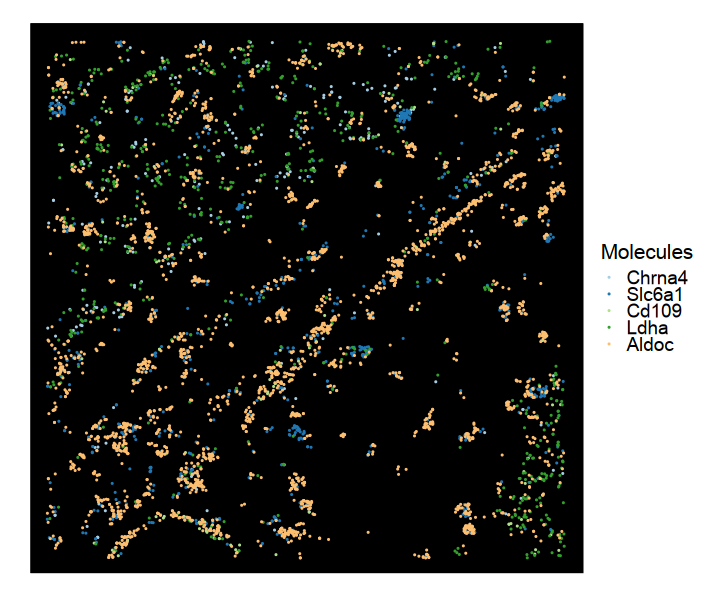

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

SpatDimPlot(
    obj, fov = "zoom1", image = "black",
    features = c('Chrna4', 'Slc6a1', 'Cd109', 'Ldha', 'Aldoc'),
    points_size = 0.25, nmols = 10000
)

In [2]:
x <- sessionInfo()
x <- capture.output(print(x))
# hide the BLAS/LAPACK paths
x <- x[!startsWith(x, "BLAS/LAPACK:")]
cat(paste(x, collapse = "\n"))

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=C              
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scplotter_0.4.0    Seurat_5.3.0       SeuratObject_5.0.2 sp_2.1-4          

loaded via a namespace (and not attached):
  [1] cubature_2.1.1              RcppAnnoy_0.0.22           
  [3] splines_4.3.3               later_1.3.2                
  [5] pbdZMQ_0.3-11               bitops_1.0-7          